## physics4481-7681/cs4812 ps4 problem 1

### due Fri 29 Oct 23:00 via gradescope

[This is the first problem of ps3 -- the remaining problems are posted in pdf]

---

In this problem, we will factor 35 by using an application of Quantum Fourier Transform (QFT), called [phase estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html), on a circuit that implements $U_f$ for $f(x) = 13x \bmod 35$. To create a circuit small enough to run on a 5-qubit quantum computer requires a bit of additional "precompilation".

A detail of Shor’s algorithm is that the circuit only needs to work on states reachable through applying $U$ to the starting state $|1\rangle$, so we can use _any_ circuit with the behavior: 

$$
\begin{aligned}
U|1\rangle &= |13\rangle \\
UU|1\rangle &= |29\rangle \\
UUU|1\rangle &= |27\rangle \\
UUUU|1\rangle &= |1\rangle \\
\end{aligned}
$$

Since we only need to correctly transform 4 different states, we can encode these onto two qubits. For this exercise, we will choose to map the 2-qubit computational basis states to the numbers as:

$$
\begin{aligned}
|1\rangle &\rightarrow |00\rangle \\
|13\rangle &\rightarrow |01\rangle \\
|29\rangle &\rightarrow |10\rangle \\
|27\rangle &\rightarrow |11\rangle \\
\end{aligned}
$$

(This is cheating, since to employ this optimization, we need to know in advance all the states $U$ is going to operate on, meaning we compute $ax \bmod N$ until back to 1 again, in turn meaning we know the period of $a^x \bmod N$, and can therefore factor $N$. Any such "precompilation", in which we use information that implies prior knowledge of $r$, doesn't scale to problems beyond the reach of classical computers. 

But the objective here is just to verify that Shor’s algorithm works as intended, 
without worrying about the shortcut to get a circuit for $U$.

<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Problem 1a:** Create a circuit ($U$) that performs the transformation:

$$
\begin{aligned}
U|00\rangle &= |01\rangle \\
U|01\rangle &= |10\rangle \\
U|10\rangle &= |11\rangle \\
U|11\rangle &= |00\rangle \\
\end{aligned}
$$

and is controlled by another qubit. The circuit will act on a 2-qubit target register named 'target', and be controlled by another single-qubit register named 'control'. You should assign your finished circuit to the variable '`cu`'.
    
</div>

<div class="alert alert-block alert-danger">
    
Your circuit should only contain [CNOTs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html) and single qubit gates. [This](https://qiskit.org/textbook/ch-gates/more-circuit-identities.html) page may be helpful.
    
</div>

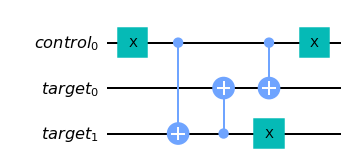

In [21]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, QuantumCircuit
import math
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

# WRITE YOUR CODE BETWEEN THESE LINES - START

#Define U
def U_gate(circ, num_gate = 1):
    for i in range(num_gate):
        circ.x(c[0])
        circ.cx(c[0],t[1])
        circ.cx(t[1],t[0])
        circ.cx(c[0],t[0])
        circ.x(t[1])
        circ.x(c[0])
        
U_gate(cu, 1)

# WRITE YOUR CODE BETWEEN THESE LINES - END
cu.draw('mpl')

We read the output of the QFT by measuring qubits, so we will need to make sure our 'counting' register contains 
enough qubits to read off $r$. In our case, $r = 4$, which means we only need 2 qubits (again employing the unrealistic prior knowledge of $r$). We'll use only 2 of our (at least) 5 qubits for the 'target' register, and use the remaining 3 qubits as our counting register.

To perform phase estimation on $U$, we need to create circuits that implement $U^{2^x}$ ($U$ repeated $2^x$ times) for each qubit (with index $x$) in our register of $n$ counting qubits. In our case, this means we need three circuits that implement:

$$U, \; U^2, \; \text{and} \; U^4 $$

The next step is to create a circuit that performs $U^2$ (i.e., a circuit equivalent to applying $U$ twice).

<div class="alert alert-block alert-success">

**Problem 1b:** Create a circuit ($U^2$) that performs the transformation:

$$
\begin{aligned}
U^2|00\rangle &= |10\rangle \\
U^2|01\rangle &= |11\rangle \\
U^2|10\rangle &= |00\rangle \\
U^2|11\rangle &= |01\rangle \\
\end{aligned}
$$

and is controlled by another qubit. The circuit will act on a 2-qubit target register named 'target', and be controlled by another single-qubit register named 'control'. You should assign your finished circuit to the variable '`cu2`'.
</div>

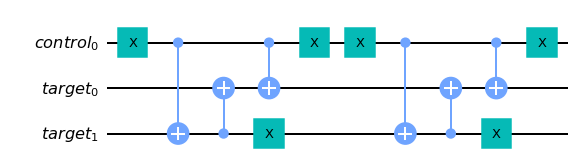

In [22]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

# WRITE YOUR CODE BETWEEN THESE LINES - START
U_gate(cu2, 2)

# WRITE YOUR CODE BETWEEN THESE LINES - END

cu2.draw('mpl')

Finally, we also need a circuit that is equivalent to applying $U$ four times (i.e. we need the circuit $U^4$).  

<div class="alert alert-block alert-success">
    
**Problem 1c:** Create a circuit ($U^4$) that performs the transformation:

$$
\begin{aligned}
U^4|00\rangle &= |00\rangle \\
U^4|01\rangle &= |01\rangle \\
U^4|10\rangle &= |10\rangle \\
U^4|11\rangle &= |11\rangle \\
\end{aligned}
$$

and is controlled by another qubit. The circuit will act on a 2-qubit target register named 'target', and be controlled by another single-qubit register named 'control'. You should assign your finished circuit to the variable '`cu4`'. _Hint: The best solution is very simple._
</div>

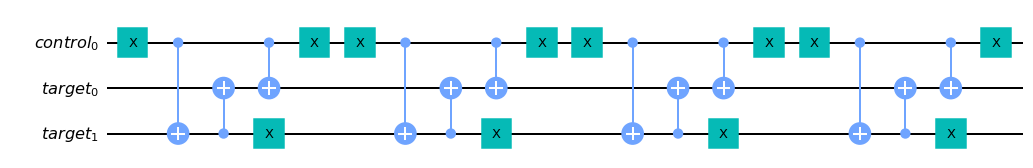

In [23]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)

# WRITE YOUR CODE BETWEEN THESE LINES - START

U_gate(cu4, 4)


# WRITE YOUR CODE BETWEEN THESE LINES - END

cu4.draw('mpl')

<div class="alert alert-block alert-success">

**Problem 1d:** Now we have controlled $U$, $U^2$ and $U^4$, we can combine this into a circuit that carries out the quantum part of Shor’s algorithm.

The initialization part is easy: we need to put the counting register into the state $|{+}{+}{+}\rangle$ (with three H-gates) and we need the target register to be in the state $|1\rangle$ (which we mapped to the computational basis state $|00\rangle$, so we don’t need to do anything here). This will be done for you.

_Your_ task is to create a circuit that carries out the controlled-$U$s, that will be used in-between the initialization and the inverse quantum Fourier transform. More formally, we want a circuit:


$$
CU_{c_0 t}CU^2_{c_1 t}CU^4_{c_2 t}
$$

Where $c_0$, $c_1$ and $c_2$ are the three qubits in the ‘counting’ register, $t$ is the ‘target’ register, and $U$ is as <a href="#u-definition">defined in the first part of this exercise</a>. In this notation, $CU_{a b}$ means $CU$ is controlled by $a$ and acts on $b$. An easy solution to this is to simply combine the circuits `cu`, `cu2` and `cu4` that you created above, but you can probably find a more efficient circuit that has the same behavior.
    
</div>
<div class="alert alert-block alert-danger">
    
Your circuit can only contain [cNOTs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html) and single qubit gates. You should try to minimize the number of cNOT gates, since this will increase the fidelity of your runs on the quantum computer. (It is possible, e.g., with 6 cNOT gates.)
    
</div>

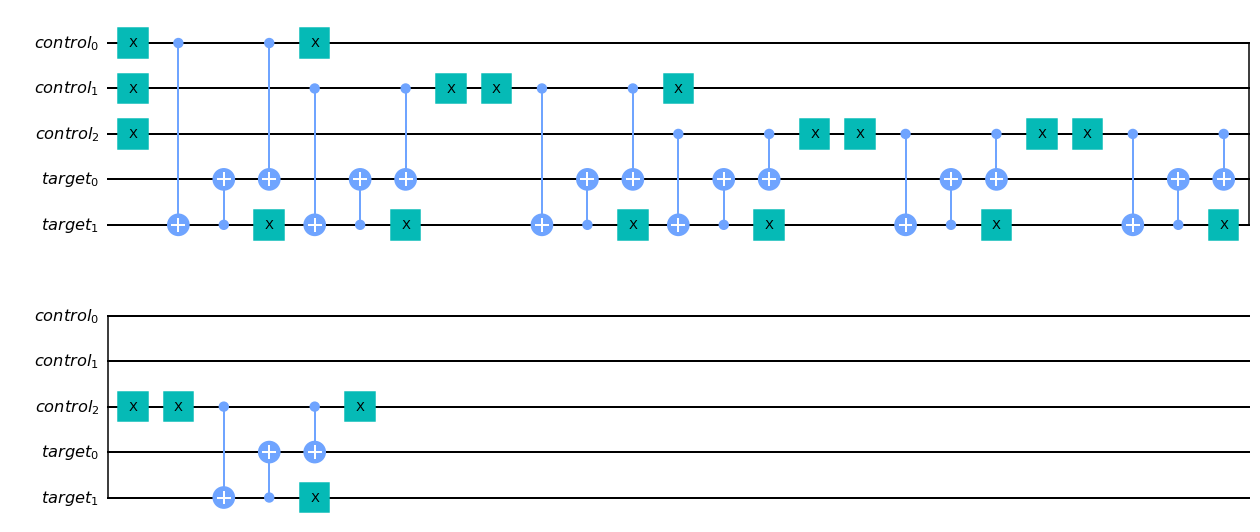

In [24]:
# Code to combine your previous solutions into your final submission
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)
solutions = [cu, cu2, cu4]
for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
cux.draw('mpl')

## Using your circuit to factorize 35

The code cell below uses your results from above to create a circuit that gives $\tfrac{s}{r}$, where $s$ is a random integer between $0$ and $r-1$, and $r$ is the period of the function $f(x) = 13^x \bmod 35$.

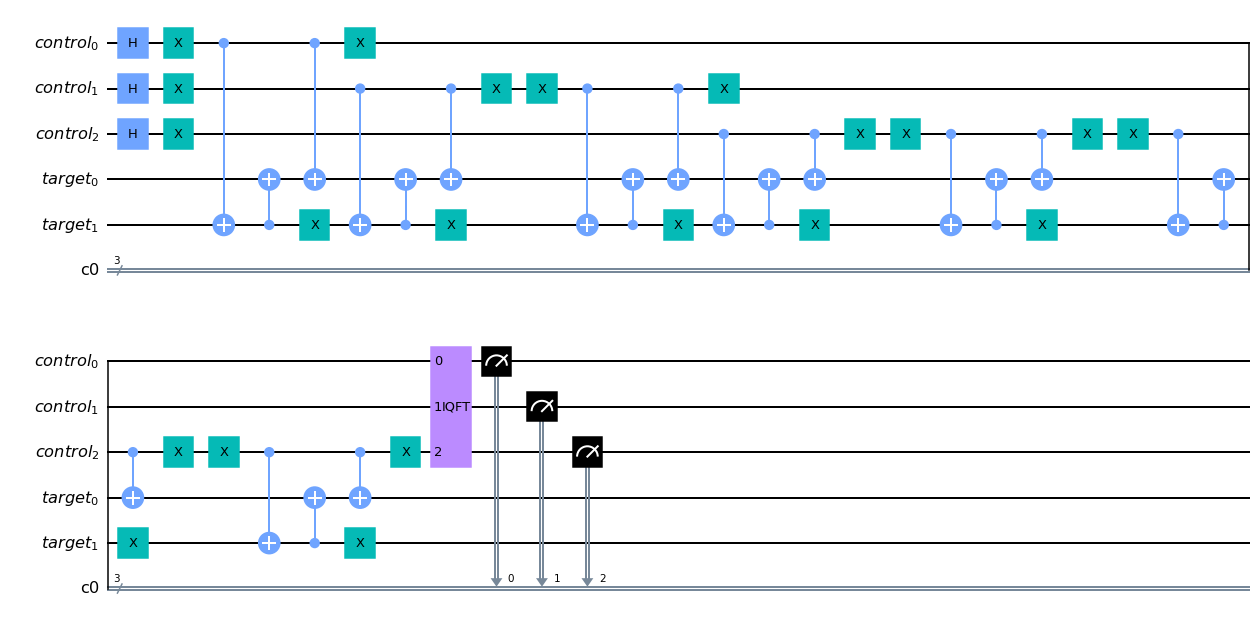

In [25]:
from qiskit.circuit.library import QFT
from qiskit import ClassicalRegister
# Create the circuit object
cr = ClassicalRegister(3)
shor_circuit = QuantumCircuit(cqr, tqr, cr)

# Initialise the qubits
shor_circuit.h(cqr)

# Add your circuit
shor_circuit = shor_circuit.compose(cux)

# Perform the inverse QFT and extract the output
shor_circuit.append(QFT(3, inverse=True), cqr)
shor_circuit.measure(cqr, cr)
shor_circuit.draw('mpl')

Let's transpile this circuit and see how large it is, and how many cNOTs it uses:

In [26]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
qasm_sim = Aer.get_backend('aer_simulator')
tqc = transpile(shor_circuit, basis_gates=['u', 'cx'], optimization_level=3)
print(f"circuit depth: {tqc.depth()}")
print(f"circuit contains {tqc.count_ops()['cx']} CNOTs")

circuit depth: 38
circuit contains 24 CNOTs


And look at the result:

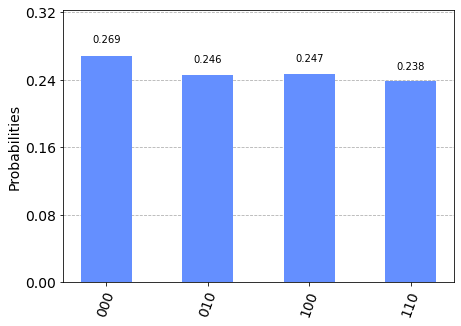

In [27]:
counts = qasm_sim.run(tqc).result().get_counts()
plot_histogram(counts)

Assuming everything has worked correctly, we should see equal probability of measuring the numbers $0$, $2$, $4$ and $6$. This is because phase estimation gives $2^n \cdot \tfrac{s}{r}$, where $n$ is the number of qubits in our counting register (here $n = 3$, $s$ is a random integer between $0$ and $r-1$, and $r$ is the number we're trying to calculate). Let's convert these to fractions that tell us $s/r$ (this is something we can easily calculate classically):

In [28]:
from fractions import Fraction
n = 3  # n is number of qubits in our 'counting' register
# Cycle through each measurement string
for measurement in counts.keys():
    # Convert the binary string to an 'int', and divide by 2^n
    decimal = int(measurement, 2)/2**n
    # Use the continued fractions algorithm to convert to form a/b
    print(Fraction(decimal).limit_denominator())

1/2
0
3/4
1/4


We can see the denominator of some of the results will tell us the correct answer $r = 4$. We can verify $r=4$ quickly:

In [29]:
13**4 % 35

1

So how do we get the factors from this? There is then a high probability that the greatest common divisor of $N$ and either $a^{r/2}-1$ or $a^{r/2}+1$ is a factor of $N$, and the greatest common divisor is also something we can easily calculate classically.

In [30]:
from math import gcd # Greatest common divisor
for x in [-1, 1]:
    print(f"Guessed factor: {gcd(13**(4//2)+x, 35)}")

Guessed factor: 7
Guessed factor: 5


We only need to find one factor, and can use it to divide $N$ to find the other factor. But in this case, _both_ $a^{r/2}-1$ or $a^{r/2}+1$ give us $35$'s factors. We can again verify this is correct:

In [31]:
7*5

35

## Running on a real quantum computer:

ibmqfactory.load_account:WARNING:2021-10-29 18:57:13,123: Credentials are already in use. The existing account in the session will be replaced.


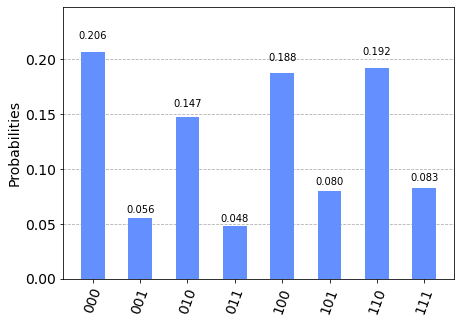

In [33]:
from qiskit import IBMQ, execute
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='cornell-uni-2', project='physics-4481') ## or replace by following line:
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_belem') ## you can change the backend if you'd like

# Run the circuit and print the counts
job = execute(shor_circuit,backend,optimization_level=3)
counts = job.result().get_counts()

plot_histogram(counts)

If your `cux` circuit had few enough 2-qubit gates, you should see we have a high probability of measuring $0$, $2$, $4$ or $6$ as we saw with the perfect simulation. You will see some extra results due to inaccuracies in the processor and unwanted things interacting with our qubits. This 'noise' gets worse the longer our circuit is, as longer computation time means more time for unwanted interactions, and more gates means more potential errors. This is why we needed to "precompile" (i.e., cheat) to create the smallest circuit possible.

In the near future, quantum systems will improve enough that we can start using more advanced error mitigation techniques to overcome these problems, which will mean we can run large enough circuits that we can perform Shor's algorithm without cheating. See, e.g., [arXiv:quant-ph/0205095](https://arxiv.org/pdf/quant-ph/0205095.pdf).

## Solution to Problem 5

In [29]:
N = 16489610256564630643535112916923355811108641344098001031067288331583286808665171617046786339936097971809351578509750095791766711439804265280013870759607137400441426479127643977162157876658992236540382908021959526526467377236783597573935695913428196196073349106495111393420643426006378602262498312757861961203637736143428383038506152192302308139730712683559118258747444396063056136141604096089882459924429272784784929225702286514719170979526896388833240751772619140658192359380273138374346897681867514177061999025782462054762064525736319677601204229329997698075606308713832462630603242249432101440492582735467155208677
#check
print(len(str(N)))


617


#### Problem a)

In [42]:
# Eve found b
b = 8163104809722288348523326712972629781027198067250912511148605876581317580397325083571917270516398792772814635677317719152653982607984283062945354578755082681716026055469139224875596539148333376221063210697518965162306256131266381297804567741262546038686002126194979198124648365243196782844466914191018507848682390572035543421583217357541600479989986584742858024853086021172108328008784607761484930883055125840024237012791505012491522397483596945313123991383581258571403804871665825341807611923404521878498098520240220400014493433844281824955348337052342842454200236837434389961935809662407486627166928763687983670306
print('Check b length',len(str(b)))
#Period
r = 4933915686630469154849121625871434769752930483909948313538138

# Check that b^r = 1 mod N
check = pow(b, r, N) 
print('b^r is 1 mod N', check == 1)


Check b length 616
b^r is 1 mod N True


In [48]:
# start factoring N usinf b and r
# As shown in lec 12:
import math
p = math.gcd(pow(b, r//2, N)-1, N)
q = math.gcd(pow(b, r//2, N)+1, N)
print('p :', p)
print('q :', q)
print('The multiple of p,q equals N? ', p*q == N)


p : 93568678362409023924911881166683800735824052916239160894928562229690142422714410987465820950594629617381383069704307795469397231280279846273127684592071546170576810734807186929835542591816124302705994139015269818608073109895080162685814789740777552004722790235210922824928414914573034949389742363275527678279
q : 176230022109506349385029000373913046829741356679559744784922061341861146339425401489397834148856615607074994206767241300563373948716838389179347180624231844912394728802167935092959937555792195950216497160551018311062562550155415153640283282054160486663070143757594502904827723231493038057623376684048253294963
The multiple of p,q equals N?  True


#### Probelm b)

In [55]:
# Check b^r /= 1 mod N
#public keys
b1 = 11981577973809058266354125286710943124023981171201561569835842543825805440702048375230488309815862909178925378428041418066325930932139930447315818237011381422581090032530621406044422723884578690170756089661600744446447673013929746872369949546623662689261668398970983865418900701880067580714596287687387309196698549182213586939436134129331140889626023098333234585405288237319659975599321584018472730704653467421546018397209289224388151176871079393755811324446693424722421772423917004021019311746852531563245021066929692268476544241195739586322260541796085198771191220287081976428284078859410634710543724526400051058717
c = 65537

check1 = pow(b1, r, N) 
print('b1^r is not 1 mod N:', check1 != 1)


# Confirm that r/(p-1)(q-1)
check2 =  ((p-1)*(q-1)) % r
check2

b1^r is not 1 mod N: True


0

In [57]:
# decrypt the message - find d
import sympy
d = sympy.mod_inverse(c, (p-1)*(q-1))
d

13691230024428404969222930091007894875589006496163887973290301578697599092016957040169688552842253553504216948359065130575232091841203428524527439116590969706349393805968090498760682070561653150912384392633396823716949545025551664891369926806677072432508831524633893624562984451930010400874526537508873744890386595601850499534639239490289432228560454230628713895924029405223388868427812518009710823878895576082141052448500703062969321834862945789648814802584218403545106442342082511554841850941097609554634043561988694998761769713692938837889816463406476820218749176578798025740567849760969565851469933268082483315093

In [65]:
decode = pow(b1, d, N)
h = hex(decode)[2:]
bytearray.fromhex(h).decode()

"Toto, I've a feeling we're not in Kansas anymore."